<a href="https://colab.research.google.com/github/FERMEN23/CNN/blob/main/GunAndHelmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Configuración de nuestro entorno de ejecución

Nota: Es necesario utilizar la GPU

In [1]:
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 25.66 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [2]:
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 352.6 MB 13 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=8599d890251b85aeb84d7007d4ee25b0e4952ca8db5345717ca9509aeb105437
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-12o44k0e/pycocotools_7337b12b502b457397aea43c6c42107d
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-12o44k0e/pycocotools_7337b12b502b457397aea43c6c42107d
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263859 sha256=e9e14fb14680ae7fef8ad921243c4c0a412ea86d6bf71cc418c70d25925ce36e
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [ ]:
#Version de tqmd para colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

#Arquitectura de red Efficeintnet
!pip install efficientnet_pytorch
!pip install tensorboardX

##Obtener Datos procesador en Roboflow

Recuerde que el espacio ENLACE corresponde al código de descarga en el formato COCO Json proporcionado por Roboflow 

In [ ]:
!curl -L " ENLACE " > \
roboflow.zip; unzip roboflow.zip; \
rm roboflow.zip

##Estructura para los datos 

En las siguientes tres celdas, movemos los datos a una estructura que la biblioteca de detección de imágenes esperará

In [5]:

!mkdir War
!mkdir War/annotations
!mkdir War/Annotations
!mkdir War/Images

In [6]:
%cp train/_annotations.coco.json War/annotations/instances_Images.json

In [7]:
%cp train/*.jpg War/Images/

##Entrenamiento

In [8]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [9]:
from train_detector import Detector

In [10]:
gtf = Detector();

In [11]:
#dirige el modelo hacia la estructura de archivos
root_dir = "./";
coco_dir = "War";
img_dir = "./";
set_dir = "Images";

In [12]:
#Preparar los datos
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [13]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [14]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [16]:
%%time
gtf.Train(num_epochs=100, model_output_dir="trained/");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a consta

CPU times: user 4h 12min 35s, sys: 5min 43s, total: 4h 18min 18s
Wall time: 4h 20min 22s


##Resultados

In [17]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [18]:
from infer_detector import Infer

In [19]:
gtf2 = Infer();

In [20]:
gtf2.Model(model_dir="trained/")

In [21]:
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

class_list

['all', 'gun', 'helmet']

In [96]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf2.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.181s)
CPU times: user 202 ms, sys: 27 ms, total: 229 ms
Wall time: 228 ms


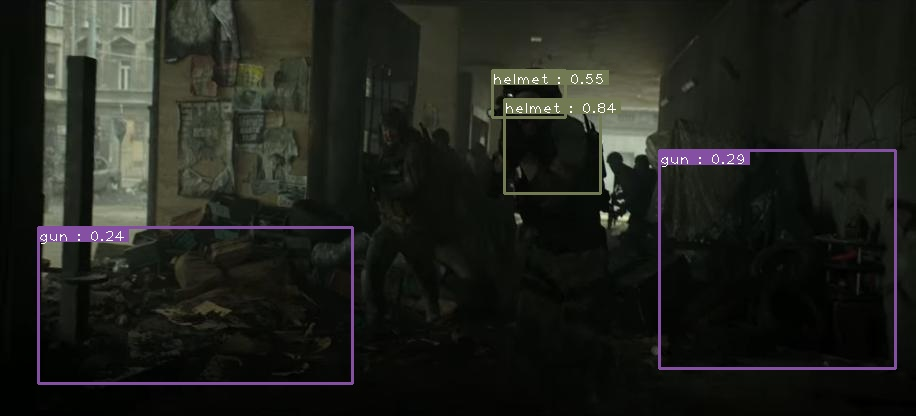

In [97]:
from IPython.display import Image
Image(filename='output.jpg') 

##Exportar los pesos de nuestro modelo a nuestra unidad de Google Drive

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/